# Pregunta 1


- Utilice un nivel de significancia de 0.01 para probar la aseveración de un analista de que la media de todos los tiempos de ejecución de un programa se ejecuta en más de 0.3 seg. A continuación, se muestra los datos de la muestra:

- 0.23	0.24	0.30	0.47	0.43	0.27	0.47	0.33  0.44	0.39	0.38	0.17	0.13	0.29	0.45	0.43


## A.	HIPOTESIS DE INVESTIGACIÓN:

- H0: La media de todos los tiempos de ejecución del programa se ejecuta en mas de 0.3s
- H1: La media de todos los tiempos de ejecución del programa se ejecuta en menos o igual de 0.3s

## B.	MUESTRA

- Nivel de confianza = 1 - α = 99% = 0.99
- n = 16

## C.	SIGNIFICANCIA

- Error tipo I = α = 0.01 = 1%

## D.	DATOS

- Los tiempos de ejecución del programa
- Se adjunta en un arreglo de numpy

In [1]:
# Importación de librerias a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats as ss

In [13]:
# Carga de los datos con numpy
data = np.array([0.23, 0.24, 0.30, 0.47, 0.43, 0.27, 0.47, 0.33, 0.44, 0.39, 0.38, 0.17, 0.13, 0.29, 0.45, 0.43])
# Tamaño de la muestra
n = len(data)
# Media de la hipotesis
mean_hyp = 0.3
# Significancia
alpha = 0.01

print('Datos recolectados para el analisis de las hipotesis: ', data)

Datos recolectados para el analisis de las hipotesis:  [0.23 0.24 0.3  0.47 0.43 0.27 0.47 0.33 0.44 0.39 0.38 0.17 0.13 0.29
 0.45 0.43]


## E.	HIPOTESIS ESTADISTICA

- Asumiendo la distribución de los datos sigue una distribución normal:

- H0:  μ > 0.3s             H. Nula
- H1:  μ <= 0.3s             H. Alterna

## F. TIPO DE PRUEBA

- Sera de 1 cola puesto que Ho tiene signo mayor a 0.3s

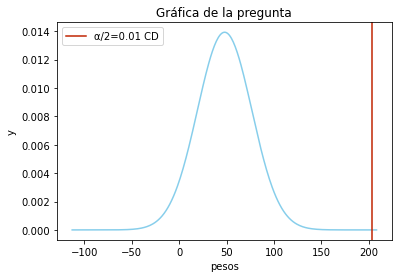

In [29]:
# Gráfica de referencia para las colas
rand = np.array(np.random.rand((100)) * 100, 'int')
mu, sigma = np.mean(rand), np.std(rand)
X = ss.norm(mu, sigma)

graph = np.arange(X.ppf(0.00000001), X.ppf(0.99999999))
plt.plot(graph, X.pdf(graph), c='skyblue')

tail_right = int(graph.size * 0.99) - 2

plt.axvline(graph[tail_right], c='#c02200', label='α/2=0.01 CD')

plt.title('Gráfica de la pregunta')
plt.ylabel('y')
plt.xlabel('pesos')

plt.legend()

## G.	ESTADISTICO DE PRUEBA

- No se conoce la desviación típica poblacional, por lo tanto, mi estadístico es:

- Formula: $$t = {{x ̅ - \mu} \over {s \over \sqrt n} }$$

In [19]:
data = {
    'tiempo de ejecución': data
}
data = pd.DataFrame(data)

data.describe()

,tiempo de ejecución
count,16.000000
mean,0.338750
std,0.109659
min,0.130000
25%,0.262500
50%,0.355000
75%,0.432500
max,0.470000


In [31]:
def test_t(x, mu, std, n):
    
    return (x - mu) / (std / np.sqrt(n))

In [33]:
t = test_t(0.3, 0.33875, 0.109659, 16)

# calculamos el p-valor por el t de prueba
p_value = ss.t.sf(np.abs(t), n - 1)
print('El p-valor es: ', p_value)

El p-valor es:  0.088966548523066


### Podemos respaldar nuestros resultados con MegaStat de Excel

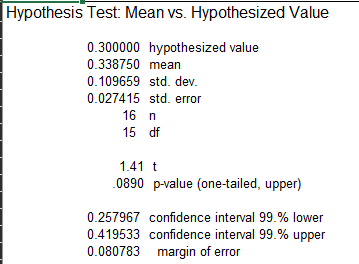

## J.	CONCLUSIÓN

- p-value > alpha
- 0.08793146405258392 > 0.01(Verdadero) No rechazo la Ho

- No hay suficiente evidencia en las muestras para rechazar la hipotesis nula de que la media de los tiempos de ejecución del programa son mayores a 0.3s. A un nivel de confianza de 99%.
